# Lab 6 Sentiment Analysis

In the last lab session, we have already explored a task on sentiment analysis

What we did in the previous lab was applying a machine learning approach for sentiment analysis (i.e. using Multinomial Naïve Bayes as the classifier)

This time, we will have a look at the lexicon-based approach sentiment analysis as was covered in this week's lecture

For this, we're going to import a trained NLTK lexicon called VADER.

VADER stands for Valence Aware Dictionary for sEntiment Reasoning.


## NLTK Vader Module

VADER is an NLTK module that provides sentiment scores based on words used ("completely" boosts a score, while "slightly" reduces it), on capitalization & punctuation ("GREAT!!!" is stronger than "great."), and negations (words like "isn't" and "doesn't" affect the outcome).

To view the source code visit https://www.nltk.org/_modules/nltk/sentiment/vader.html


Now let’s download the VADER lexicon


In [1]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Now let’s import **SentimentIntensityAnalyzer**

VADER's SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:

- negative

- neutral

- positive

- compound (computed by normalizing the scores above using some formula)


Valence score is measured on a scale from -4 to +4, where -4 stands for the most ‘Negative’ sentiment and +4 for the most ‘Positive’ sentiment. Intuitively one can guess that midpoint 0 represents ‘Neutral’ Sentiment.

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

Let’s try to input a sentence and observe the output:


In [3]:
a = 'This is a bad movie!!!'
sid.polarity_scores(a)

{'neg': 0.593, 'neu': 0.407, 'pos': 0.0, 'compound': -0.6571}

Input other sentences like negative reviews and observe the result. 

Try to use punctuation symbols such as !!!. For example use the same sentence with the added exclamation mark and observe the change in the scores.


In [4]:
a = 'This is a bad movie!!!!!!!!!'
sid.polarity_scores(a)

{'neg': 0.609, 'neu': 0.391, 'pos': 0.0, 'compound': -0.6876}

## VADER scoring

The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. 

This means the previous sentence was rated as 49.2% Positive, 50.8% Neutral and 0% Negative. Hence all these should add up to 1.


The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive)

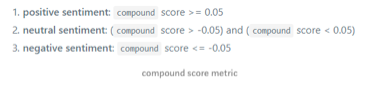


## Using VADER to analyse Amazon reviews

For this exercise we're going to apply SentimentIntensityAnalyzer to a dataset of 10,000 Amazon reviews. These data are labeled as either "pos" or "neg". At the end we'll determine the accuracy of our sentiment analysis with VADER.

Download the file “amazonreviews.tsv” from UKMfolio and upload it here.


In [5]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving amazonreviews.tsv to amazonreviews.tsv


In [6]:
import numpy as np
import pandas as pd

df = pd.read_csv('amazonreviews.tsv', sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


Use the following command to view the total number of negative and positive comments


In [7]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

Let's run the first review through VADER


In [8]:
sid.polarity_scores(df.loc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

Now, let’s view the label of the first review

In [9]:
df.loc[0]['label']

'pos'

The first review was labeled "pos", and earned a positive compound score.


## Adding Scores and Labels to the DataFrame

Next, we'll add columns to the original DataFrame to store polarity_score dictionaries, extracted compound scores, and new "pos/neg" labels derived from the compound score. 
We'll use this last column to perform an accuracy test.


In [10]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

df.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


Adding the compound scores...

In [11]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


## Adding new pos/neg" labels

Next, let’s add new “pos/neg" labels derived from the compound score


In [12]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()


,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


## Performance measure

Finally, let’s use scikit-learn to determine how close VADER came to our original 10,000 labels in terms of accuracy



In [13]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [14]:
accuracy_score(df['label'],df['comp_score'])

0.7097

Let’s view the report in tabular format


In [15]:
print(classification_report(df['label'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.86      0.52      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



This tells us that VADER correctly identified an Amazon review as "positive" or "negative" roughly 71% of the time.


# Task for today

Write code that returns a set of SentimentIntensityAnalyzer polarity scores based on your own written review. 

Include a function that takes in a review and returns a score of "Positive", "Negative" or "Neutral”.

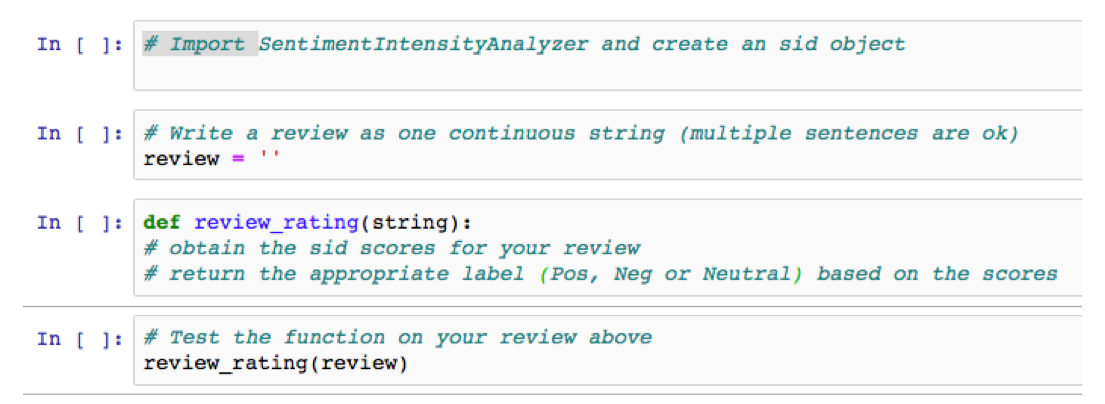






In [16]:
# Import SentimenIntensityAnalyzer and create an sid object
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [17]:
# Write a review as one continuous string (multiple sentences are ok)
review = 'This film has everything you want in a team up super hero film from awesome action sequences to great characters but still has some noticeable flaws. The fight choreography was great. The villain loki is perfect as although he may have a generic motivation, the way clashes with the heroes ideologies and has huge amounts of personality made him unforgettable. One of my favourite things about this movie is the sense of urgency and dread, it really does feel like anything could happen and some thing could go wrong and this is due to some great writing and acting. Another thing I love is that the characters work so well with each oher and are handled so well, the best avengers are all focused on more than the more boring characters which is awesome as it feels no potential was lost in the characters and it shows they actually put thought into there characters. This movie isnt perfect though as the cinematography which was dissapointing and felt really bland and ugly to look at as it felt like they dont use there unique set design. Overall this movie still holds up as one of the best and most unforgettable mcu experiences but was still dissapointing in some aspects.'

In [20]:
def review_rating(string):
  #obtain the sid scores for your review
  sentiment_dictionary = sid.polarity_scores(string)
  print('The sentiment dictionary is :', sentiment_dictionary)
  
  #return the appropriate lable (Pos, Neg or Neutral) based on the scores
  if sentiment_dictionary['compound'] >= 0.05:
    rate = 'Positive'
  elif sentiment_dictionary['compound'] >= - 0.05:
    rate = 'Negative'
  else:
    rate = 'Neutral'
  
  print('The review is rated', rate)

In [21]:
# Test the function on your review above
review_rating(review) 

The sentiment dictionary is : {'neg': 0.105, 'neu': 0.605, 'pos': 0.291, 'compound': 0.9956}
The review is rated Positive


Share the link of your program in UKMFolio.

NAME: CHONG WEI YI

MATRIC NO: A180497

The deadline for this assignment is **16 Dec 2022**. Share the file link in UKMFolio.


